In [1]:
import ROOT as r
from array import array

Welcome to JupyROOT 6.14/09


In [10]:
def makeTTree():
    # Create ROOT ROOT.TTree filled with a Gaussian distribution in x and a
    # uniform distribution in y

    tree = r.TTree("tree", "tree")
    px = array('d', [0])
    py = array('d', [0])
    tree.Branch("x", px, "x/D")
    tree.Branch("y", py, "y/D")
    for i in range(100):
        px[0] = r.gRandom.Gaus(0, 3)
        py[0] = r.gRandom.Uniform() * 30 - 15
        tree.Fill()
    return tree

In [11]:
def makeTH1():
    hh = r.TH1D("hh", "hh", 25, -10, 10)
    for i in range(100):
        hh.Fill(r.gRandom.Gaus(0, 3))
    return hh

Import TH1 into a RooDataHist
--------------------------------------------

In [13]:
# Create a ROOT ROOT.TH1 histogram
hh = makeTH1()

# Declare observable x
x = r.RooRealVar("x", "x", -10, 10)

# Create a binned dataset that imports contents of ROOT.TH1 and associates
# its contents to observable 'x'
dh = r.RooDataHist("dh", "dh", r.RooArgList(x),r.RooFit.Import(hh))

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(dh): fit range of variable x expanded to nearest bin boundaries: [-10,10] --> [-10,10]


Warning in <TROOT::Append>: Replacing existing TH1: hh (Potential memory leak).


## Plot and fit a RooDataHist
## ---------------------------------------------------

## Make plot of binned dataset showing Poisson error bars (RooFit default)

In [15]:
frame = x.frame(r.RooFit.Title("Imported ROOT.TH1 with Poisson error bars"))
dh.plotOn(frame)

# Fit a Gaussian p.d.f to the data
mean = r.RooRealVar("mean", "mean", 0, -10, 10)
sigma = r.RooRealVar("sigma", "sigma", 3, 0.1, 10)
gauss = r.RooGaussian("gauss", "gauss", x, mean, sigma)
gauss.fitTo(dh)
gauss.plotOn(frame)

<ROOT.RooPlot object ("frame_x_727c460") at 0x727c460>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  9.90000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=259.127 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

***
## Plot and fit RooDataHist with internal errors
### ---------------------------------------------------------------------------------------------
If histogram has custom error (i.e. its contents does not originate from a Poisson process but e.g. is a sum of weighted events) you can use 'sum-of-weights' error instead.
***

In [17]:
frame2 = x.frame(r.RooFit.Title("Imported TH1 with internal errors"))
dh.plotOn(frame2, r.RooFit.DataError(r.RooAbsData.SumW2))
gauss.plotOn(frame2)

<ROOT.RooPlot object ("frame_x_76624e0") at 0x76624e0>

***
Please note that error bars shown (Poisson or SumW2) are for visualization only.
A (binned) ML fit will ALWAYS assume the Poisson error interpretation of data (the mathematical definition of likelihood does not take any external definition of errors). Data with non-unit weights can only be correctly fitted with a chi^2 fit.
***

***
## Importing ROOT Trees
Import TTree into a RooDataSet (Unbinned)
Construct unbinned dataset importing tree branches x and y matching between branches and RooRealVars is done by name of the branch. Note that ONLY entries for which x,y have values within their allowed ranges as defined in RooRealVar x and y are imported. Since the y values in the import tree are in the range [-15,15] and y defines a range [-10,10] this means that the RooDataSet below will have less entries than the TTree 'tree'.
***

In [19]:
tree = makeTTree()

# Define 2nd observable y
y = r.RooRealVar("y", "y", -10, 10)
ds = r.RooDataSet("ds", "ds", r.RooArgSet(x, y),r.RooFit.Import(tree))
# Print number of events in dataset
ds.Print()

# Print unbinned dataset with default frame binning (100 bins)
frame3 = y.frame(r.RooFit.Title("Unbinned data shown in default frame binning"))
ds.plotOn(frame3)

<ROOT.RooPlot object ("frame_y_77eb3e0") at 0x77eb3e0>

[#1] INFO:Eval -- RooTreeDataStore::loadValues(ds) Ignored 29 out of range events
RooDataSet::ds[x,y] = 71 entries


***
### Plot dataset with different binning choices
***

Info in <TCanvas::Print>: png file Exercise02.png has been created


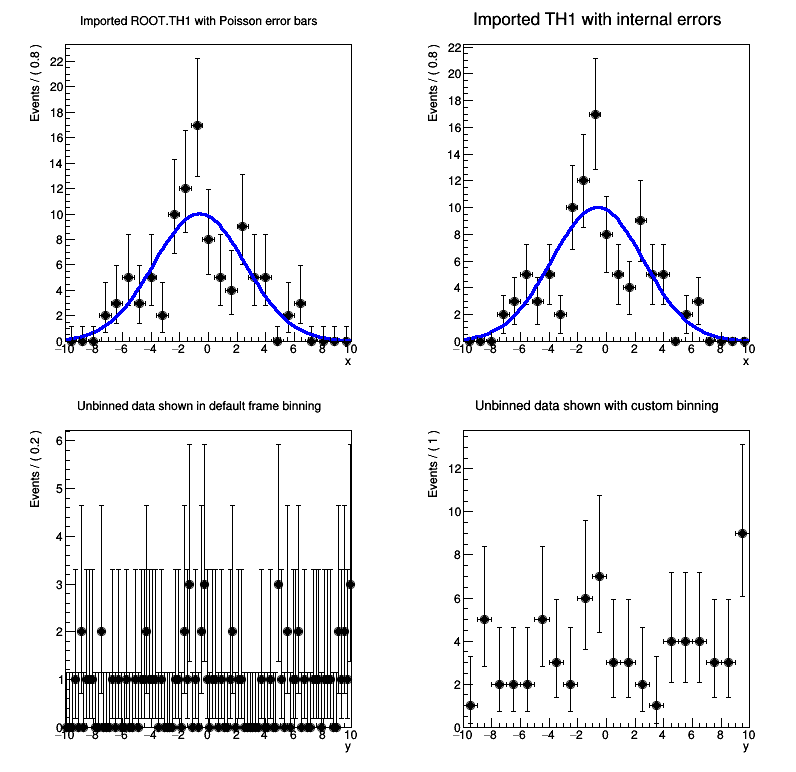

In [20]:
# Print unbinned dataset with custom binning choice (20 bins)
frame4 = y.frame(r.RooFit.Title("Unbinned data shown with custom binning"))
ds.plotOn(frame4, r.RooFit.Binning(20))

# Draw all frames on a canvas
c = r.TCanvas("Exercise02", "Exercise02", 800, 800)
c.Divide(2, 2)
c.cd(1)
r.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.cd(2)
r.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
c.cd(3)
r.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.4)
frame3.Draw()
c.cd(4)
r.gPad.SetLeftMargin(0.15)
frame4.GetYaxis().SetTitleOffset(1.4)
frame4.Draw()
c.Draw()
c.SaveAs("plots/Exercise02.png")